# 21.1 Pandas Series a DataFrames
Pandas je knihovna na práci s daty. V oblasti machine learning, se datům často říká dataset. Datasety naleznete všude možně, dokonce i naše vláda nějaké poskytuje. Mkrněte třeba na https://data.gov.cz. Typicky jsou data poskytovana jako soubory (zpravidla CSV, XML a JSON format), ktere muzete nejak zpracovat. No a pandas je knihovna prave pro toto zpracovani datasetu.

Dale budeme pracovat v Google Colab Jupyter Notebooku, prosim zalozte si novy.

Prvni co bude treba je importovat pandas. Typicky se to dela takto a pouziva se zkratka pd:

import pandas as pd

Nejprve si vyzkousime datove typy/struktury, ktere Pandas nabizi. Jsou dva: Series a DataFrame

Series 
Jedna se o jednorozmerna data, napriklad rada cisel, seznam mest, apod.. Zkuste nasledujici kod:

pocty = [50, 27, 32]
pd_pocty = pd.Series(pocty)

Nyni zkusime promennou vypsat. V jupyteru staci napsat jeji nazev - v pripade pouziti panadas to da lepsi vysledky, nez print(pd_pocty). Zkuste si oboje a uvidite...

Series jsou celkem primitivni, ale umoznuji pridat label (popisky dat), zkusme to napriklad takto:

pd_pocty = pd.Series(pocty, index = ["prumerny vek reditelu/ek", "prumerna vek sekretaru/ek", "prumerna vek zivnostniku"])

A zkuste si to opet vypsat, prostym napsanim nazvu.



DataFrame
Jedna se o dvourozmerna data, napriklad cokoli, co lze vlozit do excelu, nebo databazova tabulka jak ji znate z RDBMS. Zkuste si priklad:

zamestnanci = {
  "plat": [42000, 48400, 32500],
  "vek": [50, 40, 45]
}

df = pd.DataFrame(zamestnanci)


Jak si promennou df vypisete, to uz preci vite... Vsimnete si, ze pandas sam pridat ID (tedy primarni klice) a cisluje - pozor - od nuly. (Databaze typicky od 1)

In [39]:

import pandas as pd

pocty = [50, 27, 32]
pd_pocty = pd.Series(pocty)

pocty
pd_pocty

pd_pocty = pd.Series(pocty, index = ["prumerny vek reditelu/ek", "prumerna vek sekretaru/ek", "prumerna vek zivnostniku"])

pd_pocty

zamestnanci = {
  "plat": [42000, 48400, 32500],
  "vek": [50, 40, 45]
}

df = pd.DataFrame(zamestnanci)

df

,plat,vek
0,42000,50
1,48400,40
2,32500,45


# 21.2. Pandas manipulace s daty
Nyni je cas naucit se manipulovat s daty v pandas strukturach. Zkusime to tentokrat na hotovych prikladech. Priklady jsou pro Google Colab Jupyter Notebook, tak prosim pokracujte v tom z prikladu 21.1.

Serie
Manipulace s daty v serii je snadna, zkuste si nejprve vytvorit jednu, ve ktere jsou vysky pohori:

vysky = pd.Series([1603, 1491, 1378], index = ["Snezka", "Praded", "Plechy"])

nebo treba muzete i takto:

vysky = pd.Series({"Snezka": 1603, "Praded": 1491, "Plechy": 1378})

Nyni zkusmee vypsat vysku snezky:

vysky["Snezka"]

To preci neni tezke, ne? Co treba vypsat vsechny vyssi nez 1,4km?
vysky[vysky > 1400]

No zvladne to i male dite, tohle neni zadna veda...ale preci. Dokazete vysky vypsat v km misto m ?

vysky_v_kilometrech = vysky / 1000
vysky_v_kilometrech

No tak vidite, tohle funguje uplne stejne jako numpy...

DataFrame
Dataframe pracuje uplne stejne jako Series, ale se dvema rozmery. Pojme si jeden nadefinovat. Vlastne to budou zase hory, ale krome jmena a vysky, pridame jeste pohori, treba takto:


data = {
"pohori": ["Krkonose", "Jeseniky", "Sumava"],
"hora": ["Snezka", "Praded", "Plechy"],
"vyska": [1603, 1491, 1378]
}

A data primitivne prevedeme do pandas:

df = pd.DataFrame(data, columns = ["pohori", "hora", "vyska"])

a vypiseme

df
 
No a ted zkuste vypsat vysky vsech hor?

df['vyska']

A co vysky a jejich nazvy?

df[['hora', 'vyska']]

A co treba prvni zaznam, to je pomoci atributu loc (mysleno location): 

df.loc[0]

Druhy zaznam logicky bude loc[1] a prvni az treti zase loc[0:2]... klasika.

Ukoly pro Vas:
Zkuste nyni pouzit tahak, na ktery odkazujeme na zacatku kapitoly vyresit nasledujici ulohy:

1) Vypiste serazene hory od nejnizsi

2) Vypiste hory jen v Jesenikach

3) Spoctete prumernou vysku hor v datasetu

4) Vypiste nejmensi horu

In [40]:

import pandas as pd

vysky = pd.Series([1603, 1491, 1378], index = ["Snezka", "Praded", "Plechy"])

vysky = pd.Series({"Snezka": 1603, "Praded": 1491, "Plechy": 1378})

vysky["Snezka"]

vysky[vysky > 1400]

vysky_v_kilometrech = vysky / 1000
vysky_v_kilometrech

data = {
"pohori": ["Krkonose", "Jeseniky", "Sumava"],
"hora": ["Snezka", "Praded", "Plechy"],
"vyska": [1603, 1491, 1378]
}

df = pd.DataFrame(data, columns = ["pohori", "hora", "vyska"])

df

df['vyska']

df[['hora', 'vyska']]

df.loc[0]

df.sort_values(by=['vyska'])

df.where(df["pohori"] == "Jeseniky")

,pohori,hora,vyska
0,NaN,NaN,NaN
1,Jeseniky,Praded,1491.0
2,NaN,NaN,NaN


# 21.3 Pandas import a export csv
Tak a ted jak dostat do Google Colab Jupyteru dataset. Asi nejbeznejsi je importovat ho z webu.

https://raw.githubusercontent.com/mlcollege/ai-academy/main/05-Zaklady-datove-analyzy/data/nehody_cyklistu.csv

Nejprve musime zkontrolovat format CSV. Jsou data oddelena carkou nebo strednikem? Jakmile to zjistime, muzeme je mportovat. Zkuste nahradit <toto>, necim co by ta data nacetlo.

csv_data = pd.read_csv('<url adresa>', sep='<separator>')
csv_data

Zkuste nyni nacist a vypsat jmena vsech postav z Harryho Pottera, kdyz vite, ze dataset je zde: 

https://raw.githubusercontent.com/adamerose/datasets/master/harry_potter_characters.csv

Casto jsou data prilis velka, takze se pouziva prikaz head(), ktery ukaze jen hlavicku, napriklad takto prvnich pet zaznamu:

csv_data.head(5)

Další možností je nahrát dataset příámo do Google Colab Jupyter Notebooku a to uděláte kliknutím na ikonu složky v levém panelu nahoře. Následně uploadujete soubor, který je přílohou této úlohy a ten pak nahrajete pomocí relativní cesty:

df = pd.read_csv('dataset.csv')

Kdybyste naopak chteli dataset ulozt, lze to pomoci prikazu:

df.to_csv('dataset_zaloha.csv')

Jestli máte načtení dataset z přílohy - zkuste si ho prohlédnout a najít v něm chyby následujících typů:

Prázndná pole (buňky)
Špatný formát dat
Špatná data, nesprávné a nemožné hodnoty
Duplicitní řádky
A zkuste identifikovat řádky a sloupce, kterých se to týká...

In [41]:
csv_data_cyclists = pd.read_csv('https://raw.githubusercontent.com/mlcollege/ai-academy/main/05-Zaklady-datove-analyzy/data/nehody_cyklistu.csv', sep=';')
csv_data_cyclists

csv_data_harry_potter = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/harry_potter_characters.csv', sep=',')
csv_data_harry_potter

csv_data_cyclists.head(5)

df = pd.read_csv('dataset.csv')

df


,is a male,date of birth,gross salary,number of children,education,region
0,0.0,1965-09-30,55262.20,1.0,3.0,Hlavní město Praha
1,1.0,1971-08-14,71776.00,1.0,5.0,Hlavní město Praha
2,NaN,1997-12-31,53301.40,NaN,3.0,Hlavní město Praha
3,0.0,1998-12-17,63001.40,0.0,3.0,Hlavní město Praha
4,0.0,1991-10-24,45777.00,2.0,1.0,Moravskoslezský kraj
5,0.0,1993-11-04,48737.40,1.0,16.0,Hlavní město Praha
6,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
7,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
8,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
9,0.0,19660701,46999.00,0.0,2.0,Moravskoslezský kraj


Prázndná pole (buňky)
Špatný formát dat
Špatná data, nesprávné a nemožné hodnoty
Duplicitní řádky
A zkuste identifikovat řádky a sloupce, kterých se to týká...

In [42]:
df = pd.read_csv('dataset.csv')
df['date of birth'] = pd.to_datetime(df['date of birth'], errors='coerce')

is_null_csv = pd.notnull(df)

is_duplicate_csv = df.duplicated()




# 21.4 Pandas a čištění dat - prázdná pole
Prvním úkolem bude vyčistit data z úlohy 21.3. tak, aby tam nebyla žádná prázdná pole. Nejprve jak je najdete - prázná pole se v pandas knihovně mění na hodnotu: NaN

Naleznete ji na radcich 2, 10, 13 a 18


df = pd.read_csv('data.csv')

df

Jak ji odstranit, je to jednoduché - pomocí metody dropna(). Například takto:

clear_df = df.dropna()

clear_df

Pozor, ale udělali jsme kopii dat, ve které prostě řádky s NaN hodntami chybí. Byly databázově řečeno dropnuty. Co kdybychom ale nechtěli kopii data a místo toho jsme chtěli upravit data v původní proměnné df?

df.dropna(inplace=True)

df

Atribut inplace=True můžete využít u všech pandas funkcí, které běžné vrací nový dataframe. Pamatujte si to, bude se to hodit...


In [43]:
df = pd.read_csv('dataset.csv')
df
clear_df = df.dropna()
clear_df
df.dropna(inplace=True)
df

,is a male,date of birth,gross salary,number of children,education,region
0,0.0,1965-09-30,55262.20,1.0,3.0,Hlavní město Praha
1,1.0,1971-08-14,71776.00,1.0,5.0,Hlavní město Praha
3,0.0,1998-12-17,63001.40,0.0,3.0,Hlavní město Praha
4,0.0,1991-10-24,45777.00,2.0,1.0,Moravskoslezský kraj
5,0.0,1993-11-04,48737.40,1.0,16.0,Hlavní město Praha
6,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
7,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
8,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
9,0.0,19660701,46999.00,0.0,2.0,Moravskoslezský kraj
11,1.0,2002-01-28,74599.30,0.0,4.0,Středočeský kraj


# 21.5 Pandas a čištění dat - špatný formát
Nyní navažme na příklad 21.3. a podívejme se na jiný neduh, kterým dataset trpí. Jsou to špatné formáty dat, konrétně řádky 18 a 9 mají problém s formátem datumu, 
který neobsahuje pomlčky. Jinak je v pořádku, jen chybí pomlčky. Jak to opravit? 

Opravy formátu datůmů, časů jsou denním chlebem každého programátora, databázového vývojáře a samozřejmě i odborníka na machine learning. Je to evergreen každých dat. U pandas to máte snadné, opravuje se to celkem samo pomocí metody: to_datetime()

novy_sloupec_s_datumy = pd.to_datetime(df['date of birth'])
novy_sloupec_s_datumy

To bylo snadné, že? A jak to upravit v proměnné df? No snadno, prostě přepíšeme ten sloupec původní, tím novým:

df['date of birth'] = novy_sloupec_s_datumy
df

No a ostatní špatné formáty jsou jen jednodušší. Zkuste si například číselník education převést z float na integer, apod.  Typicky potřebujete metody:

to_numeric()
to_datetime()

A někdy i funkce:

astype()
convert_dtypes()


Zvládnete to bez nápovědy? Určitě ano...

In [44]:
novy_sloupec_s_datumy = pd.to_datetime(df['date of birth'])
novy_sloupec_s_datumy

ValueError: time data "19660701" doesn't match format "%Y-%m-%d", at position 8. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# 21.6 Pandas a čištění dat - špatná data
Tak pokračujeme v čištění. Další téma jsou špatná data. Znáte to, zase evergreen... záporná výška, věk osoby v řádu tisiců, apod. Nyní se podívejte na soubor z úlohy 21.3 na sloupec education, který odpovídá přiloženému číselníku. Co je špatně na řádku 5 a 20?

Jak to spravit? Snadné... použijeme loc[] a ručně opravíme. Například 16 je asi vysoká škola, logicky - kdo jiný by si to tam napsal...

df.loc[5, 'education'] = 5

df 

No ale ruční opravy mohou být dost zdlouhavé, naštěstí... nejsme mimoni a umíme cyklus a podmínku, takže toto je určitě lepší:


for x in df.index:
    if df.loc[x, "education"] < 1:
       df.loc[x, "education"] = 1
df

No a takhle opravíte hodně věcí, typicky použite i regulární výraz...

In [45]:
df.loc[5, 'education'] = 5

for x in df.index:
    if df.loc[x, "education"] < 1:
       df.loc[x, "education"] = 1
df

,is a male,date of birth,gross salary,number of children,education,region
0,0.0,1965-09-30,55262.20,1.0,3.0,Hlavní město Praha
1,1.0,1971-08-14,71776.00,1.0,5.0,Hlavní město Praha
3,0.0,1998-12-17,63001.40,0.0,3.0,Hlavní město Praha
4,0.0,1991-10-24,45777.00,2.0,1.0,Moravskoslezský kraj
5,0.0,1993-11-04,48737.40,1.0,5.0,Hlavní město Praha
6,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
7,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
8,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
9,0.0,19660701,46999.00,0.0,2.0,Moravskoslezský kraj
11,1.0,2002-01-28,74599.30,0.0,4.0,Středočeský kraj


# 21.7 Pandas a čištění dat - odstranění duplicit
Už víme, že v datech bývá nepořádek. Typické je, že data vznikají nějakým loggerem, který automaticky třeba něco měří a zapisuje. Zpravidla Arduino nebo RPi... a víme také, že se to někdy prostě sekne a napíše to data 2x, nebo 3x za sebou. Stalo se to i tady? Co řádky 6,7,8 nejsou Vám podezřelé?

Jak to spravit. Určitě na to bude funkce. Ano je. Zkuste příkaz:

df.duplicated()

Hned vypíše, které řádky jsou špatně. A jak je odstranit? Na to je taky funkce..

df.drop_duplicates(inplace = True)

Všiměte si atributu inplace, kterým říkáme, že se to má spravit v proměnné df a ne vracet nový čistý výsledek...

In [46]:
df.duplicated()
df.drop_duplicates(inplace = True)
df

,is a male,date of birth,gross salary,number of children,education,region
0,0.0,1965-09-30,55262.20,1.0,3.0,Hlavní město Praha
1,1.0,1971-08-14,71776.00,1.0,5.0,Hlavní město Praha
3,0.0,1998-12-17,63001.40,0.0,3.0,Hlavní město Praha
4,0.0,1991-10-24,45777.00,2.0,1.0,Moravskoslezský kraj
5,0.0,1993-11-04,48737.40,1.0,5.0,Hlavní město Praha
6,1.0,1989-03-18,36349.30,4.0,1.0,Moravskoslezský kraj
9,0.0,19660701,46999.00,0.0,2.0,Moravskoslezský kraj
11,1.0,2002-01-28,74599.30,0.0,4.0,Středočeský kraj
12,0.0,1951-01-09,31773.00,3.0,1.0,Středočeský kraj
14,1.0,1988-09-08,53508.23,4.0,3.0,Moravskoslezský kraj


# 21.8 Matplotlib rychlý úvod pro začátečníka
Knihovna matplotlib je velmi populární knihovna na tvorbu grafů. Grafy často potřebujeme k popisu dat. Je snadné ji používat a je plně integrovatelná jak s numpy, pandas, tak i se všemi knihovnami na strojové účení. 

Importu se zpravidla takto:

import matplotlib.pyplot as plt

ale někdy prostě jen:

import matplotlib

Knihovna zobrazuje data. Data musíte nejdřív připravit, vygenrovat, vyčistit, vypočítat apod. K tomu slouží typicky pandas a numpy. Zkusme si jednoduchý příklad:

import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()

Manageri mají rádi koláčové grafy, to se jen místo plot napíše pie a připraví se jednorozměrná data, která v součtu dají 100

import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])

plt.pieAno
plt.show() 

Důležité je umět to nejen s numpy číselnými řadami, ale i s panda. Nejčastěji pro popis dat potřebujeme histogram, který nám graficky říká co je v datasetu za data. Zkuste teď udělat histogram z úlohy 21.3. ze sloupce počet děti:

import matplotlib.pyplot as plt

plt.hist(df['number of children'])

plt.show()

A lze to i jednodušeji přímo pomocí pandas jako klasický sloupcový graf bar s využitím funkce value_counts:


df['number of children'].value_counts().plot.bar()

Sice je to seřazené, takže histogram rozhodně "méně kecá" než sloupcové grafy, ale používá se obojí. 

Za zmínku stojí také bodový graf - pozor ten použijte spolu s histogramem nejčastěji. Zkuste si například vynést závislost vzdělání a výšky platu:

plt.scatter(df['education'], df['gross salary'])
plt.show()

Vidíte, kdo se učí, zpravidla je lépe finančně ohodnocen a tak se naučtě, že scatter nekecá a nezkresluje nikdy a používejte ho.

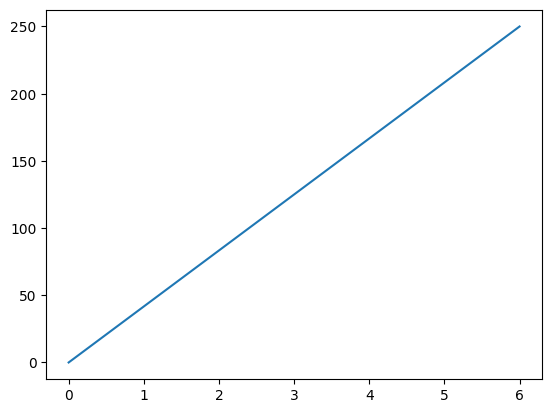

In [48]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()